# Exp31a

### How the number of classes affects accuracy?

In [58]:
import os
import datetime
import random
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

import models
import report
from dataset import Dataset
from report import Reporter
from trainer import Trainer
from batch_encoder import Dataset

In [59]:
pwd

'/home/atila.alr/Sync/codebase/src/github.com/atilaromero/ML/carving-lab'

In [60]:
# raw_dataset_folder='/home/user/sample200'
raw_dataset_folder='../datasets/govdocs1/sample200'
minimum=200
maximum=200
result_dir = 'results/exp31a'

In [61]:
rawset = Dataset.new_from_folders(raw_dataset_folder)
rawset = rawset.filter(lambda x: rawset.category_from(x) not in ['text', 'unk'])
rawset = rawset.filter_min_max(200, 200)

In [68]:
def train_nclasses(rawset, reporter, iterations=1):
    for it in range(iterations):
        for n in [2,len(rawset.categories)]:#range(2, len(rawset.categories)+1):
            cats = random.sample(rawset.by_category().keys(), n)
            print(n, cats)
            myset = rawset.filter(lambda x: rawset.category_from(x) in cats)
            myset.rebuild_categories()
            tset, vset = myset.rnd_split_fraction_by_category(0.5)

            model = models.C64_16_2pr_C32_4_2pr_C64_32_2pr_F_D(
                n, 8, 'softmax', 'categorical_crossentropy')
            result = Trainer(model).train(tset, vset)
            r.line(n=n,
                cats=','.join(cats),
                val_categorical_accuracy=result.history.history['val_categorical_accuracy'][-1],
            )
        r.close()

In [69]:
not_random = ['html', 
    'kml', 
    'log', 
    'dbase3', 
    'hlp', 
    'java', 
    'txt', 
    'csv', 
    'xml', 
    'wp', 
    'sql', 
    'f', 
    'rtf', 
]
has_random = ['eps', 
    'xls', 
    'ps', 
    'dwf', 
    'pdf', 
    'jpg', 
    'gif', 
    'doc', 
    'pps', 
    'png', 
    'kmz', 
    'ppt', 
    'swf', 
    'gz', 
    'pptx', 
    ]

In [70]:
mydset = rawset.filter(lambda x: rawset.category_from(x) in not_random)
r = report.Reporter2(result_dir + '/not_random.tsv')
mydset.rebuild_categories()
mydset.categories

In [73]:
train_nclasses(mydset, r)

2 ['html', 'f']
13 ['dbase3', 'html', 'xml', 'rtf', 'csv', 'txt', 'hlp', 'log', 'wp', 'java', 'kml', 'f', 'sql']


In [74]:
data = pd.read_csv('results/exp31a/not_random.tsv', sep='\t')
data

,n,cats,val_categorical_accuracy
0,2,"html,f",0.849625
1,13,"dbase3,html,xml,rtf,csv,txt,hlp,log,wp,java,km...",0.682875


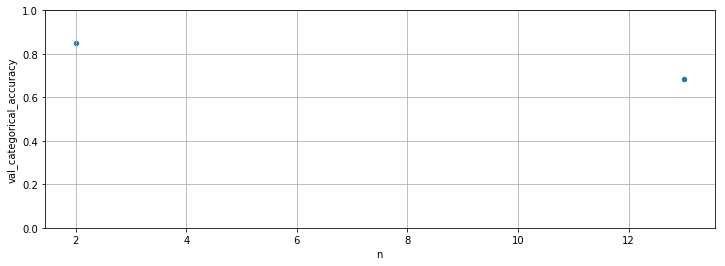

In [75]:
data.plot.scatter('n', 'val_categorical_accuracy', figsize=(12,4), style='-o', ylim=(0,1), grid=True)


In [77]:
mydset = rawset.filter(lambda x: rawset.category_from(x) in has_random)
r = report.Reporter2(result_dir + '/has_random.tsv')
mydset.rebuild_categories()
mydset.categories

['doc',
 'dwf',
 'eps',
 'gif',
 'gz',
 'jpg',
 'kmz',
 'pdf',
 'png',
 'pps',
 'ppt',
 'pptx',
 'ps',
 'swf',
 'xls']

In [78]:
train_nclasses(mydset, r)

2 ['dwf', 'png']
15 ['swf', 'gif', 'pptx', 'png', 'jpg', 'pdf', 'doc', 'ppt', 'gz', 'pps', 'ps', 'eps', 'kmz', 'dwf', 'xls']


In [79]:
data = pd.read_csv('results/exp31a/has_random.tsv', sep='\t')
data

,n,cats,val_categorical_accuracy
0,2,"dwf,png",0.662625
1,15,"swf,gif,pptx,png,jpg,pdf,doc,ppt,gz,pps,ps,eps...",0.323625


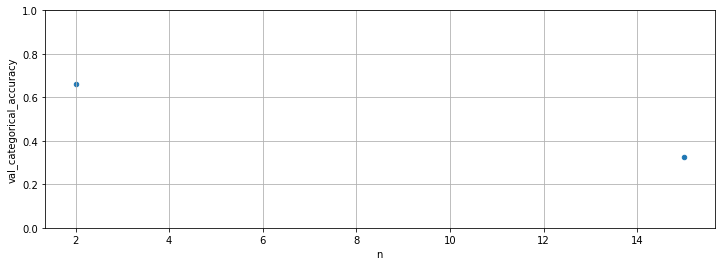

In [81]:
data.plot.scatter('n', 'val_categorical_accuracy', figsize=(12,4), style='-o', ylim=(0,1), grid=True)
